In [1]:
from fit import *
import matplotlib.pyplot as plt
%matplotlib widget
from utils import plot_event, plot_generator, get_data_files, preceding_noise_file

In [2]:
data_date_and_time = '20190504034237'
data_files = get_data_files(data_date_and_time)
noise_files = [preceding_noise_file(f) for f in data_files]
cfg = CounterConfig(data_files, noise_files)

In [3]:
corsika_file = '/home/isaac/NIZ/he_corsika/iact_DAT000004.dat'
pe = ProcessEvents(cfg, frozen_noise=True)
real_nfits = pe.gen_nfits_from_ei(corsika_file)

In [4]:
real_nfits

[b'20240701181117'_000013d6,
 b'20240701181117'_000013cd,
 b'20240701181117'_000013db,
 b'20240701181117'_00001408,
 b'20240701181117'_000013ea,
 b'20240701181117'_000013c7,
 b'20240701181117'_000013f6,
 b'20240701181117'_00001416,
 b'20240701181117'_000013f0,
 b'20240701181117'_000013c3,
 b'20240701181117'_00001400,
 b'20240701181117'_000013e3]

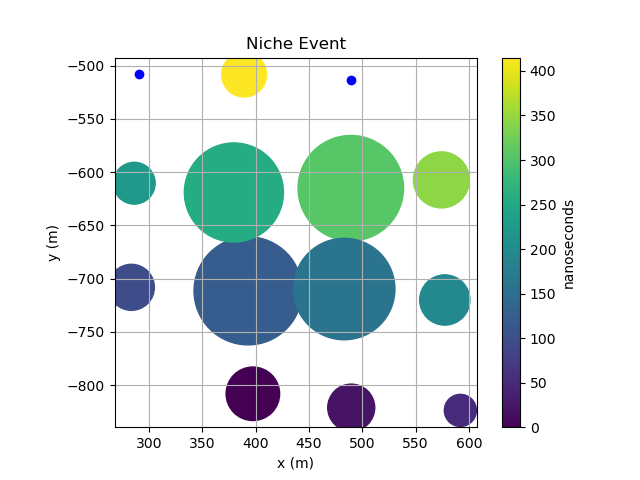

In [5]:
ty = tyro(real_nfits)
pf = NichePlane(real_nfits)
plot_event(ty)

In [6]:
import CHASM as ch
ei = ch.EventioWrapper(corsika_file)
print(ei.X[ei.nch.argmax()])
print(ei.nch.max())
print(ei.theta)

613.0
10620761.0
0.4464552


In [7]:
guess = make_guess(ty, pf,cfg)
[print(p) for p in guess];

FitParam(name='xmax', value=500.0, limits=(400.0, 800.0), error=50.0, fixed=False)
FitParam(name='nmax', value=1000000.0, limits=(10000.0, 100000000.0), error=100000.0, fixed=False)
FitParam(name='zenith', value=0.4841963140513514, limits=(0.0, 0.5841963140513514), error=0.017453292519943295, fixed=False)
FitParam(name='azimuth', value=4.444408831156389, limits=(4.3444088311563895, 4.544408831156389), error=0.017453292519943295, fixed=False)
FitParam(name='corex', value=436.37734834269077, limits=(379.5, 489.2), error=5.0, fixed=False)
FitParam(name='corey', value=-664.9153122954511, limits=(-711.4, -615.1), error=5.0, fixed=False)
FitParam(name='corez', value=-29.0, limits=(-29.0, -29.0), error=1.0, fixed=True)
FitParam(name='x0', value=0.0, limits=(0, 0), error=1, fixed=True)
FitParam(name='lambda', value=70.0, limits=(60.0, 80.0), error=1, fixed=True)
FitParam(name='t_offset', value=0.0, limits=(-450.0, 450.0), error=10.0, fixed=False)


In [8]:
guess = BasicParams.adjust_guess(guess)

In [9]:
pt = PeakTimes(real_nfits, BasicParams, cfg)
pt.target_parameters = ['zenith','azimuth']
m = init_minuit(pt, guess)
m.simplex(ncall=40)

┌─────────────────────────────────────────────────────────────────────────┐
│                               Simplex                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 642.1 (χ²/ndof = 64.2)     │              Nfcn = 41               │
│ EDM = 5.73 (Goal: 0.1)           │           time = 12.9 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           ABOVE call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Hesse not run           │            NO covariance             │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ xmax     │    500    │    50     │            │            │   400   │   800   │  yes  │
│ 1 │ nmax     │   1.0e6   │   0.1e6   │            │            │  10000  │  1e+08  │  yes  │
│ 2 │ zenith   │ 445.93e-3 │  0.05e-3  │            │            │    0    │0.584196 │       │
│ 3 │ azimuth  │  4.46448  │  0.00012  │            │            │ 4.34441 │ 4.54441 │       │
│ 4 │ corex    │    436    │     5     │            │            │  379.5  │  489.2  │  yes  │
│ 5 │ corey    │   -665    │     5     │            │            │ -711.4  │ -615.1  │  yes  │
│ 6 │ corez    │    -29    │     1     │            │            │         │         │  yes  │
│ 7 │ x0       │     0     │     1     │            │            │         │         │  yes  │
│ 8 │ lambda   │    70     │     1     │            │            │   60    │   80    │  yes  │
│ 9 │ t_offset │     0     │    10     │            │            │  -450   │   450   │  yes  │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

In [10]:
tpguess = update_guess(m)
pw = PulseWidth(real_nfits, BasicParams, cfg)
pw.target_parameters = ['xmax']
m = init_minuit(pw, tpguess)
m.simplex(ncall=40)

┌─────────────────────────────────────────────────────────────────────────┐
│                               Simplex                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 378.4 (χ²/ndof = 34.4)     │              Nfcn = 15               │
│ EDM = 0.039 (Goal: 0.1)          │            time = 4.9 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Hesse not run           │            NO covariance             │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ xmax     │   400.1   │    3.5    │            │            │   400   │   800   │       │
│ 1 │ nmax     │   1.0e6   │   0.1e6   │            │            │  10000  │  1e+08  │  yes  │
│ 2 │ zenith   │ 445.93e-3 │  0.05e-3  │            │            │    0    │0.584196 │  yes  │
│ 3 │ azimuth  │  4.46448  │  0.00012  │            │            │ 4.34441 │ 4.54441 │  yes  │
│ 4 │ corex    │    436    │     5     │            │            │  379.5  │  489.2  │  yes  │
│ 5 │ corey    │   -665    │     5     │            │            │ -711.4  │ -615.1  │  yes  │
│ 6 │ corez    │    -29    │     1     │            │            │         │         │  yes  │
│ 7 │ x0       │     0     │     1     │            │            │         │         │  yes  │
│ 8 │ lambda   │    70     │     1     │            │            │   60    │   80    │  yes  │
│ 9 │ t_offset │     0     │    10     │            │            │  -450   │   450   │  yes  │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

In [11]:
xmaxguess = update_guess(m)
pa = PulseArea(real_nfits, BasicParams, cfg)
pa.target_parameters = ['nmax']
m = init_minuit(pa, xmaxguess)
m.simplex(ncall=20)

┌─────────────────────────────────────────────────────────────────────────┐
│                               Simplex                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 5604 (χ²/ndof = 509.5)     │              Nfcn = 21               │
│ EDM = 15.9 (Goal: 0.1)           │            time = 7.8 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           ABOVE call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Hesse not run           │            NO covariance             │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ xmax     │   400.1   │    3.5    │            │            │   400   │   800   │  yes  │
│ 1 │ nmax     │  12.93e6  │  0.17e6   │            │            │  10000  │  1e+08  │       │
│ 2 │ zenith   │ 445.93e-3 │  0.05e-3  │            │            │    0    │0.584196 │  yes  │
│ 3 │ azimuth  │  4.46448  │  0.00012  │            │            │ 4.34441 │ 4.54441 │  yes  │
│ 4 │ corex    │    436    │     5     │            │            │  379.5  │  489.2  │  yes  │
│ 5 │ corey    │   -665    │     5     │            │            │ -711.4  │ -615.1  │  yes  │
│ 6 │ corez    │    -29    │     1     │            │            │         │         │  yes  │
│ 7 │ x0       │     0     │     1     │            │            │         │         │  yes  │
│ 8 │ lambda   │    70     │     1     │            │            │   60    │   80    │  yes  │
│ 9 │ t_offset │     0     │    10     │            │            │  -450   │   450   │  yes  │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

In [12]:
nmaxguess = update_guess(m)
pa = NormalizedPulseArea(real_nfits, BasicParams, cfg)
pa.target_parameters = ['xmax','nmax','corex','corey']
m = init_minuit(pa, nmaxguess)
m.simplex()

/home/isaac/NIZ/niche_fit.py:101: RuntimeWarning: invalid value encountered in power
  lout[fl5] += pk*np.exp(-f5**(2+f5/2))


┌─────────────────────────────────────────────────────────────────────────┐
│                               Simplex                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 127.9 (χ²/ndof = 16.0)     │              Nfcn = 130              │
│ EDM = 0.0369 (Goal: 0.1)         │           time = 44.2 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Hesse not run           │            NO covariance             │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ xmax     │    694    │     4     │            │            │   400   │   800   │       │
│ 1 │ nmax     │  8.06e6   │  0.04e6   │            │            │  10000  │  1e+08  │       │
│ 2 │ zenith   │ 445.93e-3 │  0.05e-3  │            │            │    0    │0.584196 │  yes  │
│ 3 │ azimuth  │  4.46448  │  0.00012  │            │            │ 4.34441 │ 4.54441 │  yes  │
│ 4 │ corex    │  438.73   │   0.35    │            │            │  379.5  │  489.2  │       │
│ 5 │ corey    │  -659.51  │   0.35    │            │            │ -711.4  │ -615.1  │       │
│ 6 │ corez    │    -29    │     1     │            │            │         │         │  yes  │
│ 7 │ x0       │     0     │     1     │            │            │         │         │  yes  │
│ 8 │ lambda   │    70     │     1     │            │            │   60    │   80    │  yes  │
│ 9 │ t_offset │     0     │    10     │            │            │  -450   │   450   │  yes  │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

In [13]:
guess = update_guess(m)
at = AllTunka(real_nfits, BasicParams, cfg)
at.target_parameters = ['t_offset']
m = init_minuit(at, guess)
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 6.583e+04 (χ²/ndof = 1400.6)│              Nfcn = 62               │
│ EDM = 2.08 (Goal: 0.0002)        │           time = 22.3 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   ABOVE EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ xmax     │    694    │     4     │            │            │   400   │   800   │  yes  │
│ 1 │ nmax     │  8.06e6   │  0.04e6   │            │            │  10000  │  1e+08  │  yes  │
│ 2 │ zenith   │ 445.93e-3 │  0.05e-3  │            │            │    0    │0.584196 │  yes  │
│ 3 │ azimuth  │  4.46448  │  0.00012  │            │            │ 4.34441 │ 4.54441 │  yes  │
│ 4 │ corex    │  438.73   │   0.35    │            │            │  379.5  │  489.2  │  yes  │
│ 5 │ corey    │  -659.51  │   0.35    │            │            │ -711.4  │ -615.1  │  yes  │
│ 6 │ corez    │    -29    │     1     │            │            │         │         │  yes  │
│ 7 │ x0       │     0     │     1     │            │            │         │         │  yes  │
│ 8 │ lambda   │    70     │     1     │            │            │   60    │   80    │  yes  │
│ 9 │ t_offset │ 57.746418 │ 0.000028  │            │            │  -450   │   450   │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────────────────────────────────────────────────────────────────────────┐
│          │     xmax     nmax   zenith  azimuth    corex    corey    corez       x0   lambda t_offset │
├──────────┼───────────────────────────────────────────────────────────────────────────────────────────┤
│     xmax │        0        0        0        0        0        0        0        0        0        0 │
│     nmax │        0        0        0        0        0        0        0        0        0        0 │
│   zenith │        0        0        0        0        0        0        0        0        0        0 │
│  azimuth │        0        0        0        0        0        0        0        0        0        0 │
│    corex │        0        0        0        0        0        0        0        0        0        0 │
│    corey │        0        0        0        0        0        0        0        0        0        0 │
│    corez │        0        0        0        0        0        0        0        0        0        0 │
│       x0 │        0        0        0        0        0        0        0        0        0        0 │
│   lambda │        0        0        0        0        0        0        0        0        0        0 │
│ t_offset │        0        0        0        0        0        0        0        0        0 7.68e-10 │
└──────────┴───────────────────────────────────────────────────────────────────────────────────────────┘

In [14]:
guess = update_guess(m)
at = AllSamples(real_nfits, BasicParams, cfg)
at.target_parameters = ['t_offset']
m = init_minuit(at, guess)


In [15]:
m.tol=.01
m.fixed = True
m.fixed['xmax'] = False
m.fixed['nmax'] = False
m.fixed['zenith'] = False
m.fixed['azimuth'] = False
m.fixed['corex'] = False
m.fixed['corey'] = False
# m.fixed['t_offset'] = False
# m.scan()
m.simplex()

┌─────────────────────────────────────────────────────────────────────────┐
│                               Simplex                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.789e+04 (χ²/ndof = 276.1)│              Nfcn = 296              │
│ EDM = 15.4 (Goal: 0.01)          │           time = 88.6 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   ABOVE EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Hesse not run           │            NO covariance             │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ xmax     │  610.30   │   0.19    │            │            │   400   │   800   │       │
│ 1 │ nmax     │  9.776e6  │  0.004e6  │            │            │  10000  │  1e+08  │       │
│ 2 │ zenith   │447.3639e-3│ 0.0029e-3 │            │            │    0    │0.584196 │       │
│ 3 │ azimuth  │ 4.463372  │ 0.000005  │            │            │ 4.34441 │ 4.54441 │       │
│ 4 │ corex    │  438.272  │   0.017   │            │            │  379.5  │  489.2  │       │
│ 5 │ corey    │ -658.125  │   0.004   │            │            │ -711.4  │ -615.1  │       │
│ 6 │ corez    │    -29    │     1     │            │            │         │         │  yes  │
│ 7 │ x0       │     0     │     1     │            │            │         │         │  yes  │
│ 8 │ lambda   │    70     │     1     │            │            │   60    │   80    │  yes  │
│ 9 │ t_offset │ 57.746418 │ 0.000028  │            │            │  -450   │   450   │  yes  │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

In [16]:
m.tol=.01
m.fixed = True
m.fixed['xmax'] = False
m.fixed['nmax'] = False
m.fixed['lambda'] = False
# m.scan()
m.simplex()

┌─────────────────────────────────────────────────────────────────────────┐
│                               Simplex                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.787e+04 (χ²/ndof = 267.9)│              Nfcn = 323              │
│ EDM = 4.4 (Goal: 0.01)           │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   ABOVE EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Hesse not run           │            NO covariance             │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ xmax     │  610.74   │   0.10    │            │            │   400   │   800   │       │
│ 1 │ nmax     │  9.792e6  │  0.004e6  │            │            │  10000  │  1e+08  │       │
│ 2 │ zenith   │447.3639e-3│ 0.0029e-3 │            │            │    0    │0.584196 │  yes  │
│ 3 │ azimuth  │ 4.463372  │ 0.000005  │            │            │ 4.34441 │ 4.54441 │  yes  │
│ 4 │ corex    │  438.272  │   0.017   │            │            │  379.5  │  489.2  │  yes  │
│ 5 │ corey    │ -658.125  │   0.004   │            │            │ -711.4  │ -615.1  │  yes  │
│ 6 │ corez    │    -29    │     1     │            │            │         │         │  yes  │
│ 7 │ x0       │     0     │     1     │            │            │         │         │  yes  │
│ 8 │ lambda   │   69.95   │   0.19    │            │            │   60    │   80    │       │
│ 9 │ t_offset │ 57.746418 │ 0.000028  │            │            │  -450   │   450   │  yes  │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

In [17]:
import CHASM as ch
ei = ch.EventioWrapper(corsika_file)
print(ei.X[ei.nch.argmax()])
print(ei.nch.max())
print(ei.theta)

613.0
10620761.0
0.4464552


In [18]:
fitpars = [p.value for p in m.params]
fit_ev = BasicParams.get_event(fitpars)
print(fit_ev)

Event(E=7531928215747947.0, Xmax=610.7440601533677, Nmax=9791506.680472331, zenith=0.44736388662407073, azimuth=4.463371573860039, corex=438.2717678055564, corey=-658.1246027340482, corez=-29.0, X0=0.0, Lambda=69.94953207477833)


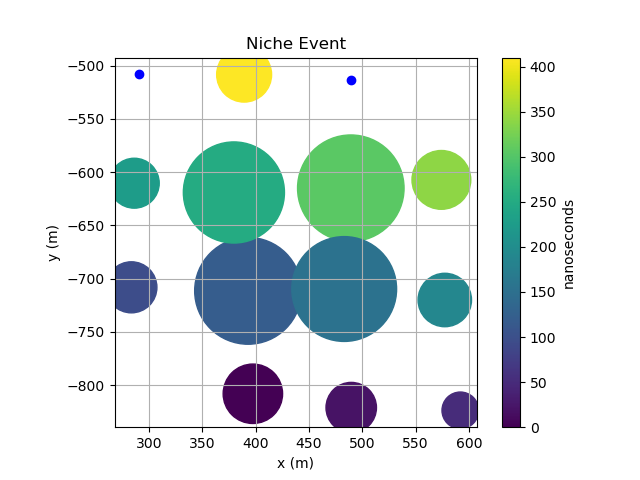

In [19]:
fit_nfits = pe.gen_nfits_from_event(fit_ev)
plot_event(tyro(fit_nfits))

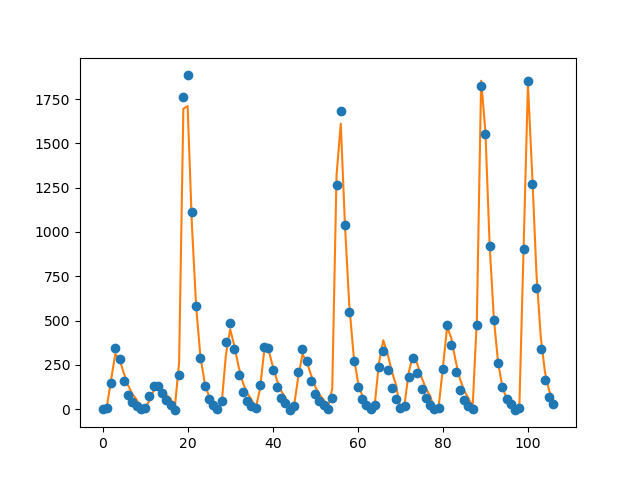

In [20]:
plt.figure()
fitpars = [p.value for p in m.params]
plt.errorbar(np.arange(len(at.real_values)),at.real_values,yerr=at.error, fmt="o")
plt.plot(at.get_output(fitpars))

In [21]:
at.chi2(fitpars)/m.ndof

267.94043106319026

In [22]:
at.get_output(fitpars)

array([1.19401326e+00, 1.12982163e+01, 1.64561342e+02, 3.11903554e+02,
       2.80957337e+02, 2.03159522e+02, 1.34769028e+02, 8.60451400e+01,
       5.45066983e+01, 5.19503165e-01, 4.74783471e+00, 4.70796731e+01,
       1.04184375e+02, 1.18665960e+02, 1.03411300e+02, 8.04063222e+01,
       5.92064183e+01, 1.02777961e+01, 2.64921245e+02, 1.69603646e+03,
       1.71051456e+03, 1.04338180e+03, 5.80968403e+02, 2.99025988e+02,
       1.50875766e+02, 7.30348918e+01, 3.36756957e+01, 2.01047857e+00,
       3.07220108e+01, 3.06543189e+02, 4.51128797e+02, 3.55986257e+02,
       2.38286596e+02, 1.48867170e+02, 9.02221437e+01, 5.42293664e+01,
       3.98902279e+00, 1.12817429e+02, 3.29039326e+02, 3.34062743e+02,
       2.45364135e+02, 1.63069563e+02, 1.03292596e+02, 6.44034437e+01,
       1.35375486e+00, 1.63327504e+01, 1.80222422e+02, 3.09019743e+02,
       2.70621689e+02, 1.94150132e+02, 1.28400602e+02, 8.22427872e+01,
       5.22879333e+01, 6.59245071e+00, 1.16665829e+02, 1.31747674e+03,
      

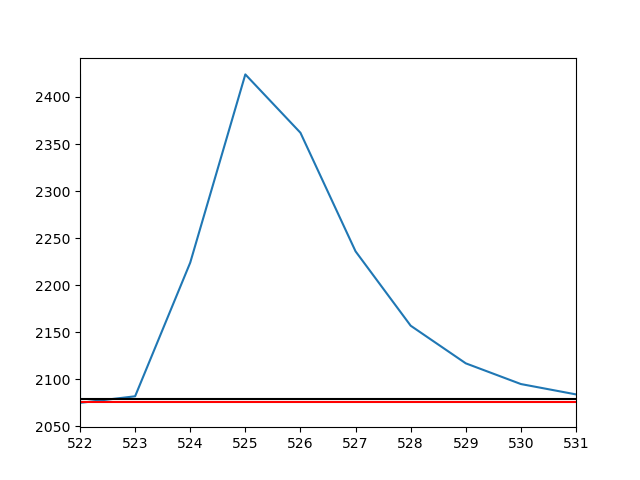

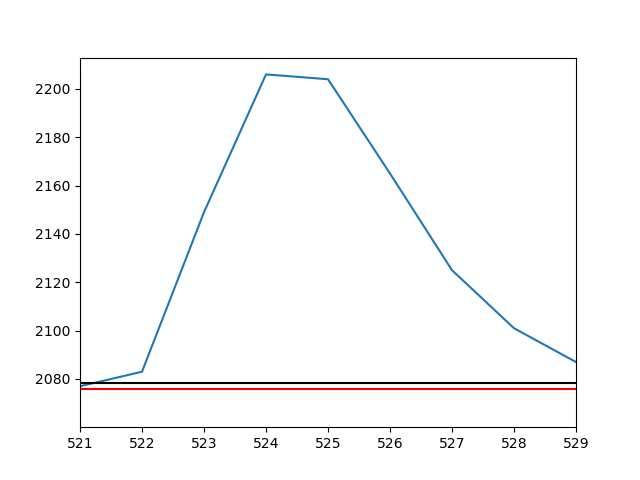

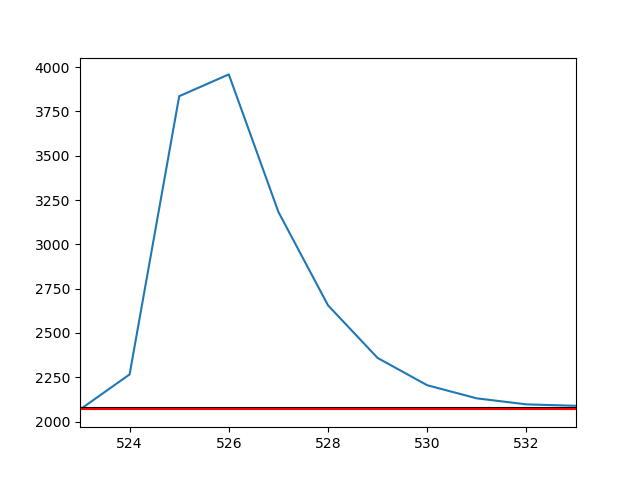

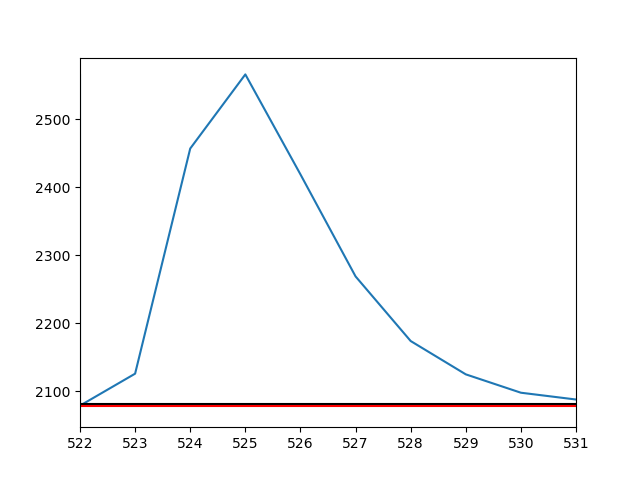

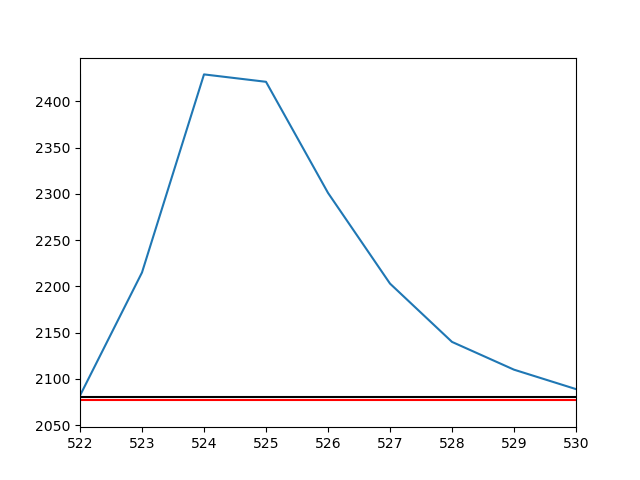

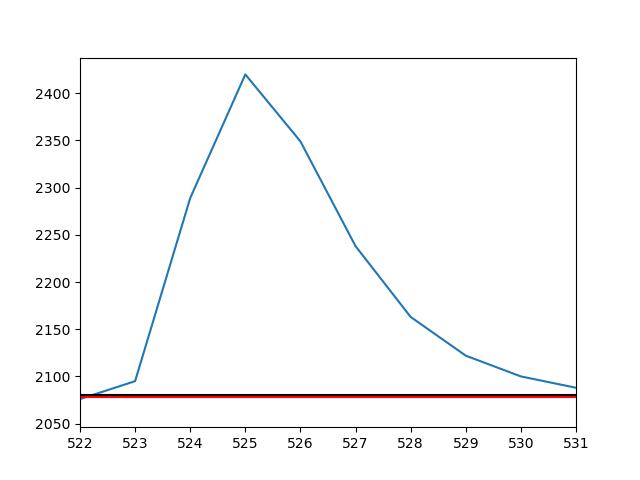

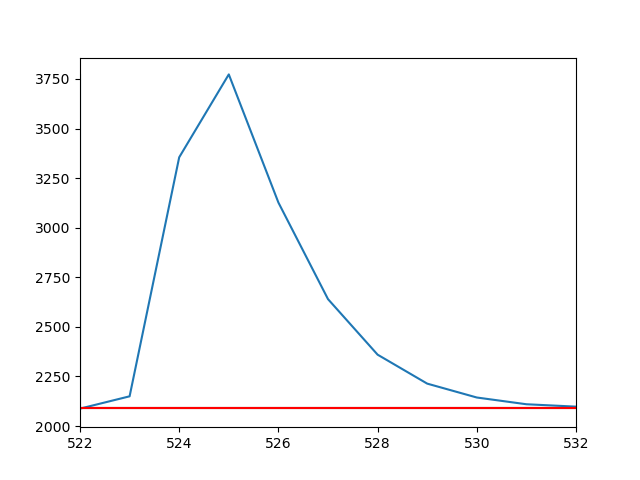

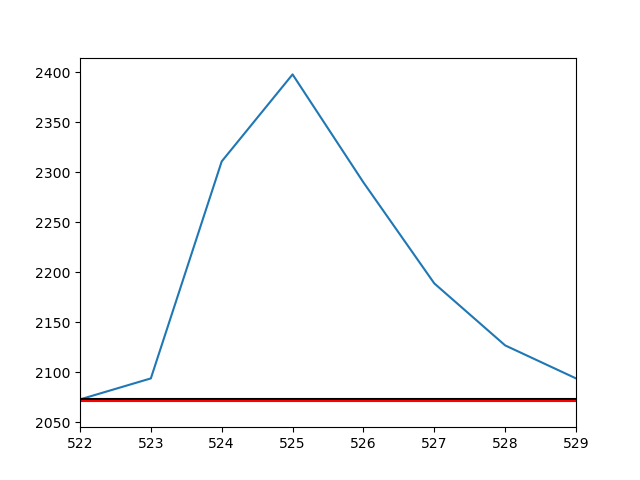

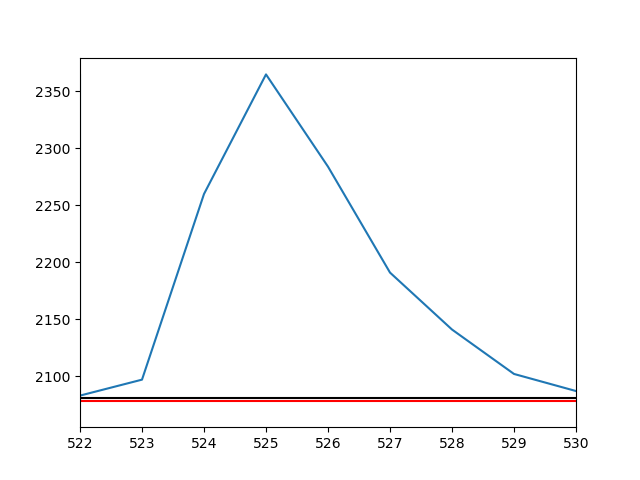

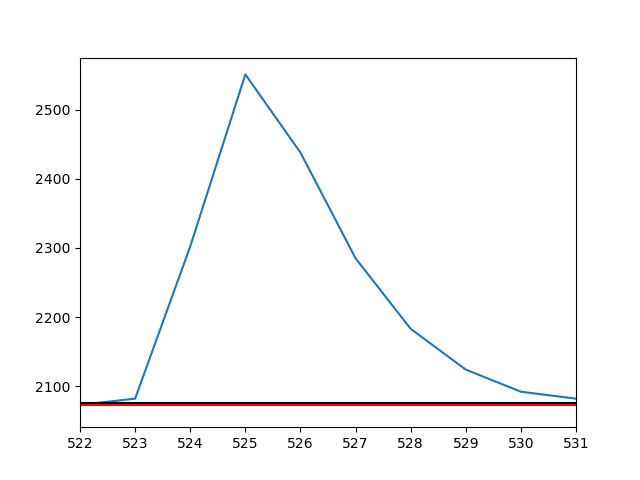

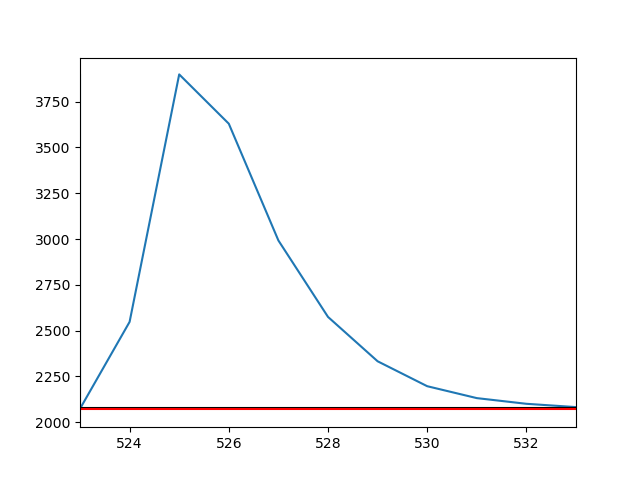

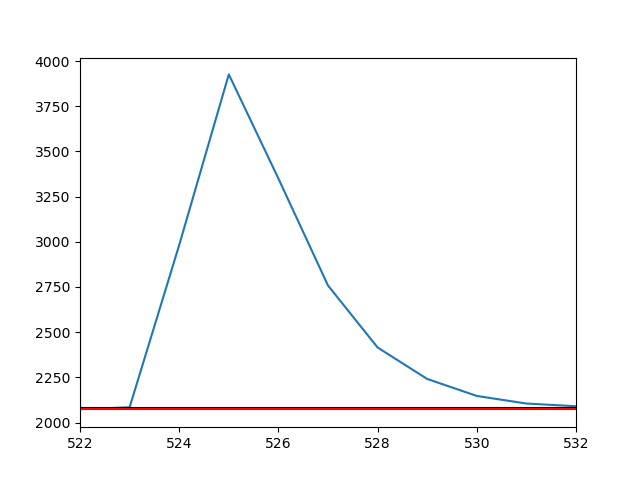

In [23]:
for f in at.nfits:
    plt.figure()
    plt.plot(f.waveform)
    plt.hlines(f.baseline + f.baseline_error,0,1040, color='k')
    plt.hlines(f.baseline,0,1040, color='r')
    plt.vlines(f.start_rise, f.baseline,f.waveform.max())
    plt.xlim(f.start_rise,f.end_fall)


In [25]:
cfg.data_files

[PosixPath('/home/isaac/niche_data/20190504/bardeen/20190504034237.bin'),
 PosixPath('/home/isaac/niche_data/20190504/bell/20190504034237.bin'),
 PosixPath('/home/isaac/niche_data/20190504/curie/20190504034237.bin'),
 PosixPath('/home/isaac/niche_data/20190504/dirac/20190504034237.bin'),
 PosixPath('/home/isaac/niche_data/20190504/feynman/20190504034237.bin'),
 PosixPath('/home/isaac/niche_data/20190504/meitner/20190504034237.bin'),
 PosixPath('/home/isaac/niche_data/20190504/newton/20190504034237.bin'),
 PosixPath('/home/isaac/niche_data/20190504/noether/20190504034237.bin'),
 PosixPath('/home/isaac/niche_data/20190504/rossi/20190504034237.bin'),
 PosixPath('/home/isaac/niche_data/20190504/rubin/20190504034237.bin'),
 PosixPath('/home/isaac/niche_data/20190504/rutherford/20190504034237.bin'),
 PosixPath('/home/isaac/niche_data/20190504/yukawa/20190504034237.bin')]